In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("17-cardekho.csv")

In [5]:
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [141]:
df = df.drop("Unnamed: 0",axis=1)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15400 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15400 non-null  object 
 1   brand              15400 non-null  object 
 2   model              15400 non-null  object 
 3   vehicle_age        15400 non-null  int64  
 4   km_driven          15400 non-null  int64  
 5   seller_type        15400 non-null  object 
 6   fuel_type          15400 non-null  object 
 7   transmission_type  15400 non-null  object 
 8   mileage            15400 non-null  float64
 9   engine             15400 non-null  int64  
 10  max_power          15400 non-null  float64
 11  seats              15400 non-null  int64  
 12  selling_price      15400 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


In [145]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,1.540000e+04
mean,6.036688,54954.661234,19.703773,1485.369805,100.515618,5.326234,7.708932e+05
std,3.013879,37264.668657,4.168997,519.074081,42.625054,0.805245,8.166713e+05
min,0.000000,100.000000,6.000000,793.000000,38.400000,2.000000,4.000000e+04
25%,4.000000,30000.000000,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,50000.000000,19.670000,1248.000000,88.500000,5.000000,5.550000e+05
75%,8.000000,70000.000000,22.700000,1582.000000,117.300000,5.000000,8.220000e+05
max,29.000000,590000.000000,33.540000,5998.000000,626.000000,9.000000,1.450000e+07


In [147]:
df["seats"].value_counts()

seats
5    12905
7     1920
8      311
6      127
4       75
9       55
2        7
Name: count, dtype: int64

In [149]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [151]:
df[df.duplicated()].shape

(167, 13)

In [153]:
df.drop_duplicates(keep="first",ignore_index=True)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15228,Hyundai Grand,Hyundai,Grand,5,9229,Dealer,Petrol,Manual,18.90,1197,82.00,5,545000
15229,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15230,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15231,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000


In [155]:
df[df["seats"]==0]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price


In [157]:
df.loc[df["seats"]==0,"seats"] = 5

In [159]:
df["seats"].value_counts()

seats
5    12905
7     1920
8      311
6      127
4       75
9       55
2        7
Name: count, dtype: int64

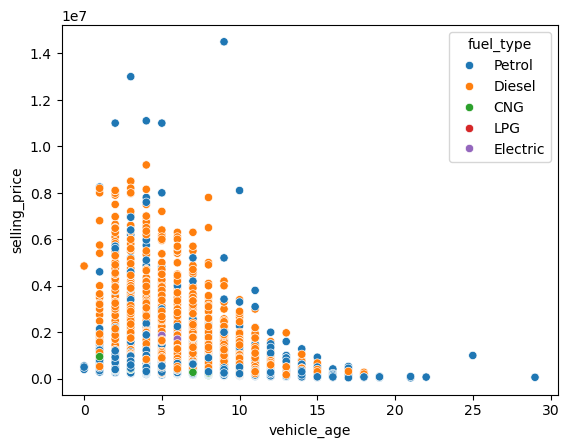

In [161]:
sns.scatterplot(x=df["vehicle_age"],y=df["selling_price"],hue=df["fuel_type"])  #belirli outlier lar olduğu için grafiğin verimi düşük
plt.show()

In [162]:
df["selling_price"].max()  #ortalamanın çok üstünde bir sayı

14500000

In [163]:
df= df[(df["selling_price"] < 15000000)]

In [167]:
df.describe()   #2 adet outlier gitti

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,1.540000e+04
mean,6.036688,54954.661234,19.703773,1485.369805,100.515618,5.326234,7.708932e+05
std,3.013879,37264.668657,4.168997,519.074081,42.625054,0.805245,8.166713e+05
min,0.000000,100.000000,6.000000,793.000000,38.400000,2.000000,4.000000e+04
25%,4.000000,30000.000000,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,50000.000000,19.670000,1248.000000,88.500000,5.000000,5.550000e+05
75%,8.000000,70000.000000,22.700000,1582.000000,117.300000,5.000000,8.220000e+05
max,29.000000,590000.000000,33.540000,5998.000000,626.000000,9.000000,1.450000e+07


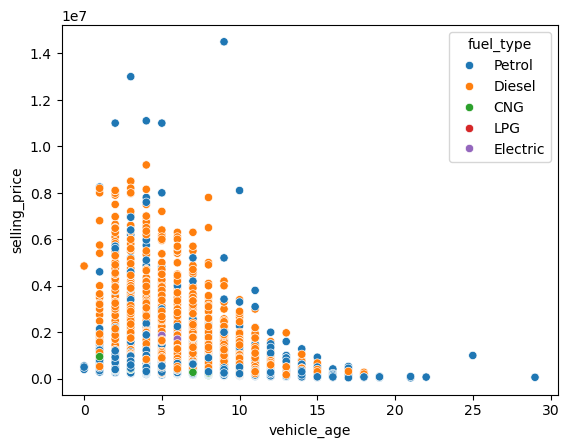

In [169]:
sns.scatterplot(x=df["vehicle_age"],y=df["selling_price"],hue=df["fuel_type"])  #belirli outlier lar olduğu için grafiğin verimi düşük
plt.show()

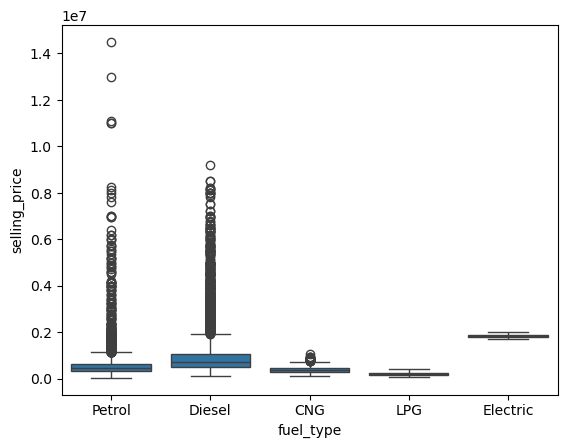

In [170]:
sns.boxplot(data=df, x="fuel_type",y="selling_price")
plt.show()

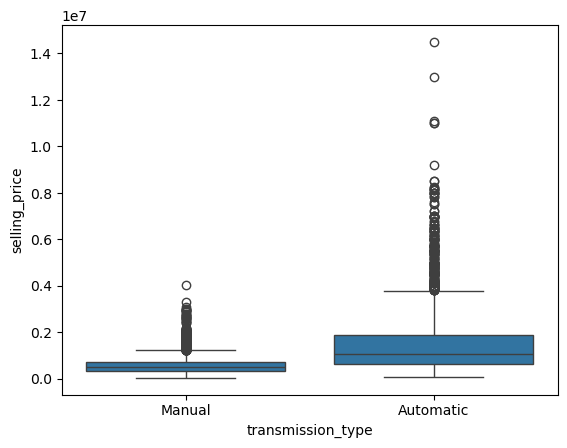

In [172]:
sns.boxplot(data=df, x="transmission_type",y="selling_price")
plt.show()

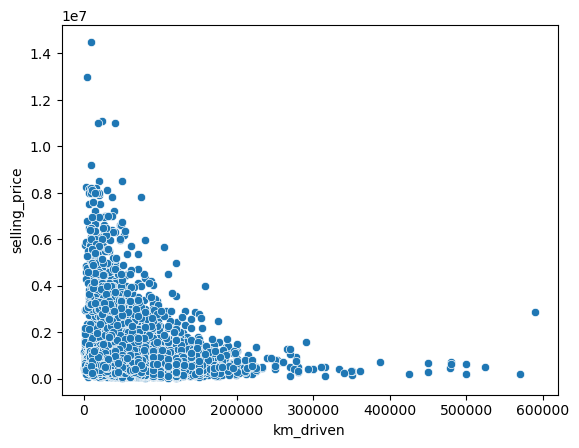

In [174]:
sns.scatterplot(x=df["km_driven"],y=df["selling_price"])  #belirli outlier lar olduğu için grafiğin verimi düşük
plt.show()

In [176]:
df = df[(df["km_driven"]< 600000)]

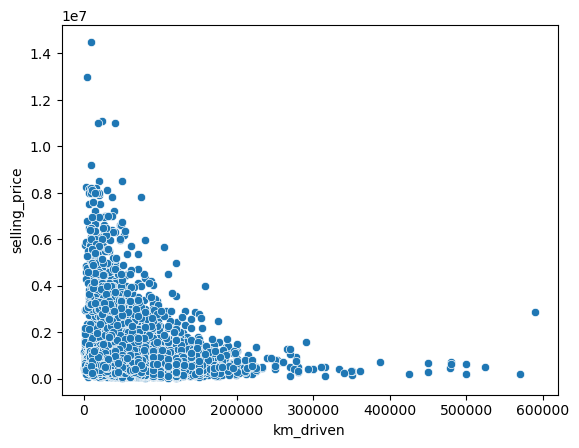

In [179]:
sns.scatterplot(x=df["km_driven"],y=df["selling_price"])  #belirli outlier lar olduğu için grafiğin verimi düşük
plt.show()

In [181]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,1.540000e+04
mean,6.036688,54954.661234,19.703773,1485.369805,100.515618,5.326234,7.708932e+05
std,3.013879,37264.668657,4.168997,519.074081,42.625054,0.805245,8.166713e+05
min,0.000000,100.000000,6.000000,793.000000,38.400000,2.000000,4.000000e+04
25%,4.000000,30000.000000,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,50000.000000,19.670000,1248.000000,88.500000,5.000000,5.550000e+05
75%,8.000000,70000.000000,22.700000,1582.000000,117.300000,5.000000,8.220000e+05
max,29.000000,590000.000000,33.540000,5998.000000,626.000000,9.000000,1.450000e+07


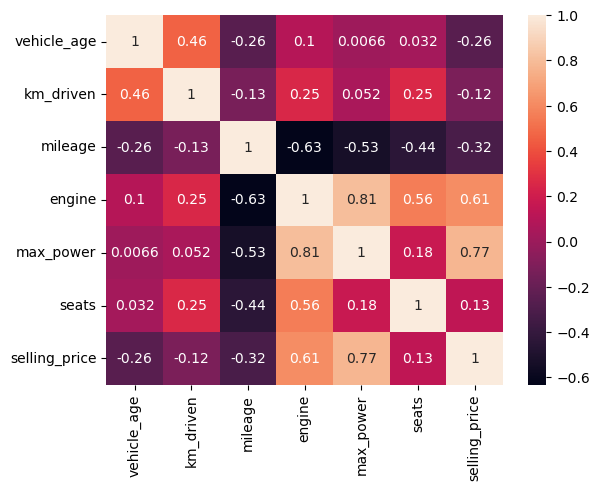

In [183]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [185]:
from sklearn.model_selection import train_test_split

In [187]:
X = df.drop("selling_price",axis=1)
y = df["selling_price"]

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [191]:
categoric_cols = df.select_dtypes("object").columns.to_list()

In [193]:
categoric_cols

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [195]:
unique_values = df[categoric_cols].nunique()

In [197]:
unique_values

car_name             119
brand                 30
model                118
seller_type            3
fuel_type              5
transmission_type      2
dtype: int64

In [199]:
#seller_type , fuek_type, tansmission_type --> one hot encoding
#car_name, brand, mode--> frequency encoding

In [201]:
one_hot_columns = ["seller_type","fuel_type","transmission_type"]
freq_columns = ["car_name","brand","model"]

In [203]:
X_train["car_name"].value_counts() / len(X_train)  #frekansı hesaplıyoruz

car_name
Hyundai i20              0.060390
Maruti Swift Dzire       0.056401
Maruti Swift             0.052226
Maruti Alto              0.051855
Maruti Wagon R           0.047403
                           ...   
Isuzu MUX                0.000093
Jaguar XE                0.000093
Hyundai Aura             0.000093
Maserati Quattroporte    0.000093
Nissan X-Trail           0.000093
Name: count, Length: 116, dtype: float64

In [205]:
for col in freq_columns:
    freq = X_train[col].value_counts() / len(X_train)
    X_train[col + "_freq"] = X_train[col].map(freq)
    X_test[col + "_freq"] = X_test[col].map(freq) 
    
    mean_freq = freq.mean()
    X_test[col + "_freq"] = X_test[col + "_freq"].fillna(mean_freq)

In [207]:
X_train.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,car_name_freq,brand_freq,model_freq
2347,BMW 5,BMW,5,6,55121,Dealer,Diesel,Automatic,18.48,1995,177.00,5,0.007885,0.028850,0.007885
5340,Maruti Swift,Maruti,Swift,7,6500,Individual,Diesel,Manual,22.90,1248,74.00,5,0.052226,0.328479,0.052226
5255,Toyota Innova,Toyota,Innova,5,122000,Dealer,Diesel,Manual,12.99,2494,100.60,7,0.033859,0.050000,0.033859
4163,Mahindra Thar,Mahindra,Thar,5,62000,Dealer,Diesel,Manual,16.55,2498,105.00,6,0.004360,0.065770,0.004360
4095,Maruti Ertiga,Maruti,Ertiga,5,27000,Dealer,Petrol,Manual,19.01,1462,103.26,7,0.021707,0.328479,0.021707


In [209]:
X_test.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,car_name_freq,brand_freq,model_freq
1479,Audi A4,Audi,A4,9,39000,Dealer,Diesel,Automatic,17.11,1968,174.33,5,0.006772,0.013358,0.006772
8900,Maruti Vitara,Maruti,Vitara,4,100000,Individual,Diesel,Manual,24.30,1248,88.50,5,0.019017,0.328479,0.019017
5289,Maruti Swift Dzire,Maruti,Swift Dzire,3,70000,Individual,Diesel,Manual,28.40,1248,74.02,5,0.056401,0.328479,0.056401
9657,Maruti Ciaz,Maruti,Ciaz,7,49000,Dealer,Petrol,Manual,20.73,1373,91.20,5,0.023098,0.328479,0.023098
10782,Hyundai Grand,Hyundai,Grand,6,46497,Dealer,Petrol,Manual,18.90,1197,82.00,5,0.037570,0.192857,0.037570


In [211]:
X_train = X_train.drop(["car_name", "brand", "model"], axis = 1)
X_test = X_test.drop(["car_name", "brand", "model"], axis = 1)

In [215]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [221]:
transformer = ColumnTransformer(
    transformers = [
        ("onehot",OneHotEncoder(drop="first",handle_unknown="ignore"),one_hot_columns)
    ],remainder="passthrough"
)

In [223]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [225]:
encoded_cols = transformer.get_feature_names_out()

In [227]:
encoded_cols

array(['onehot__seller_type_Individual',
       'onehot__seller_type_Trustmark Dealer', 'onehot__fuel_type_Diesel',
       'onehot__fuel_type_Electric', 'onehot__fuel_type_LPG',
       'onehot__fuel_type_Petrol', 'onehot__transmission_type_Manual',
       'remainder__vehicle_age', 'remainder__km_driven',
       'remainder__mileage', 'remainder__engine', 'remainder__max_power',
       'remainder__seats', 'remainder__car_name_freq',
       'remainder__brand_freq', 'remainder__model_freq'], dtype=object)

In [229]:
X_train = pd.DataFrame(X_train, columns=encoded_cols)
X_test = pd.DataFrame(X_test, columns=encoded_cols)

In [231]:
X_train.head()

,onehot__seller_type_Individual,onehot__seller_type_Trustmark Dealer,onehot__fuel_type_Diesel,onehot__fuel_type_Electric,onehot__fuel_type_LPG,onehot__fuel_type_Petrol,onehot__transmission_type_Manual,remainder__vehicle_age,remainder__km_driven,remainder__mileage,remainder__engine,remainder__max_power,remainder__seats,remainder__car_name_freq,remainder__brand_freq,remainder__model_freq
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,55121.0,18.48,1995.0,177.00,5.0,0.007885,0.028850,0.007885
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,6500.0,22.90,1248.0,74.00,5.0,0.052226,0.328479,0.052226
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,122000.0,12.99,2494.0,100.60,7.0,0.033859,0.050000,0.033859
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,62000.0,16.55,2498.0,105.00,6.0,0.004360,0.065770,0.004360
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,27000.0,19.01,1462.0,103.26,7.0,0.021707,0.328479,0.021707


In [235]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10780 entries, 0 to 10779
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   onehot__seller_type_Individual        10780 non-null  float64
 1   onehot__seller_type_Trustmark Dealer  10780 non-null  float64
 2   onehot__fuel_type_Diesel              10780 non-null  float64
 3   onehot__fuel_type_Electric            10780 non-null  float64
 4   onehot__fuel_type_LPG                 10780 non-null  float64
 5   onehot__fuel_type_Petrol              10780 non-null  float64
 6   onehot__transmission_type_Manual      10780 non-null  float64
 7   remainder__vehicle_age                10780 non-null  float64
 8   remainder__km_driven                  10780 non-null  float64
 9   remainder__mileage                    10780 non-null  float64
 10  remainder__engine                     10780 non-null  float64
 11  remainder__max_

In [237]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   onehot__seller_type_Individual        4620 non-null   float64
 1   onehot__seller_type_Trustmark Dealer  4620 non-null   float64
 2   onehot__fuel_type_Diesel              4620 non-null   float64
 3   onehot__fuel_type_Electric            4620 non-null   float64
 4   onehot__fuel_type_LPG                 4620 non-null   float64
 5   onehot__fuel_type_Petrol              4620 non-null   float64
 6   onehot__transmission_type_Manual      4620 non-null   float64
 7   remainder__vehicle_age                4620 non-null   float64
 8   remainder__km_driven                  4620 non-null   float64
 9   remainder__mileage                    4620 non-null   float64
 10  remainder__engine                     4620 non-null   float64
 11  remainder__max_po

In [239]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [241]:
model = AdaBoostRegressor()

In [243]:
model.fit(X_train, y_train)

AdaBoostRegressor()

In [245]:
y_pred = model.predict(X_test)

In [247]:
print("r2 score: ", r2_score(y_pred, y_test))
print("mean squared error: ", mean_squared_error(y_pred, y_test))
print("mean absolute error: ", mean_absolute_error(y_pred, y_test))

r2 score:  0.4392261096201473
mean squared error:  252876133123.59265
mean absolute error:  420141.0601664123


In [249]:
params = {
    "n_estimators" : [50, 80, 100, 120],
    "learning_rate" : [0.001, 0.01, 0.1, 1.0, 2.0],
    "loss" : ["linear", "square", "exponential"]
}

In [251]:
rcv = RandomizedSearchCV(estimator=AdaBoostRegressor(), param_distributions=params, scoring='r2', cv=5)

In [253]:
rcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1, 1.0,
                                                          2.0],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 80, 100, 120]},
                   scoring='r2')

In [255]:
rcv.best_params_

{'n_estimators': 80, 'loss': 'exponential', 'learning_rate': 0.1}

In [258]:
y_pred = rcv.predict(X_test)

In [260]:
print("r2 score: ", r2_score(y_pred, y_test))
print("mean squared error: ", mean_squared_error(y_pred, y_test))
print("mean absolute error: ", mean_absolute_error(y_pred, y_test))

r2 score:  0.7634359302982616
mean squared error:  119982533188.95436
mean absolute error:  225356.560396035


In [262]:
params = {
    "estimator__max_depth" : [3,4,5],
    "n_estimators" : [50, 80, 100, 120],
    "learning_rate" : [0.001, 0.01, 0.1, 1.0, 2.0],
    "loss" : ["linear", "square", "exponential"]
}

In [264]:
rcv = RandomizedSearchCV(estimator=AdaBoostRegressor(DecisionTreeRegressor()), param_distributions=params, scoring='r2', cv=5)

In [266]:
rcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   param_distributions={'estimator__max_depth': [3, 4, 5],
                                        'learning_rate': [0.001, 0.01, 0.1, 1.0,
                                                          2.0],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 80, 100, 120]},
                   scoring='r2')

In [267]:
rcv.best_params_

{'n_estimators': 80,
 'loss': 'exponential',
 'learning_rate': 0.01,
 'estimator__max_depth': 5}

In [268]:
y_pred = rcv.predict(X_test)
print("r2 score: ", r2_score(y_pred, y_test))
print("mean squared error: ", mean_squared_error(y_pred, y_test))
print("mean absolute error: ", mean_absolute_error(y_pred, y_test))

r2 score:  0.8450752524404285
mean squared error:  79004619919.26683
mean absolute error:  148637.6786613602
